In [1]:
import os
from PIL import Image

# Path to the fracture directory
fracture_dir = "c:/Users/ADMIN/Desktop/bone-fracture-hybrid/dataset/binary_classification/train/fracture"

# Initialize counters
misplaced_count = 0
corrupted_count = 0

# Iterate through all files in the directory
for filename in os.listdir(fracture_dir):
    file_path = os.path.join(fracture_dir, filename)
    
    # Check if the file is an image
    try:
        with Image.open(file_path) as img:
            img.verify()  # Verify that it is a readable image
    except (IOError, SyntaxError):
        print(f"Corrupted file: {filename}")
        corrupted_count += 1

print(f"Total corrupted files: {corrupted_count}")

Total corrupted files: 0


# Verify Dataset Integrity

This notebook checks for misplaced images and corrupted files in the `binary_classification/train/fracture` directory. The goal is to ensure that all images are correctly labeled and readable.

# Verify Other Dataset Directories

In this section, we will verify the integrity of other directories used for training, validation, and testing. This includes checking for misplaced and corrupted files in the `no_fracture` directory and other relevant splits.

In [2]:
# Path to the no_fracture directory
no_fracture_dir = "c:/Users/ADMIN/Desktop/bone-fracture-hybrid/dataset/binary_classification/train/no_fracture"

# Initialize counters for no_fracture
corrupted_count_no_fracture = 0

# Iterate through all files in the no_fracture directory
for filename in os.listdir(no_fracture_dir):
    file_path = os.path.join(no_fracture_dir, filename)
    
    # Check if the file is an image
    try:
        with Image.open(file_path) as img:
            img.verify()  # Verify that it is a readable image
    except (IOError, SyntaxError):
        print(f"Corrupted file in no_fracture: {filename}")
        corrupted_count_no_fracture += 1

print(f"Total corrupted files in no_fracture: {corrupted_count_no_fracture}")

Total corrupted files in no_fracture: 0


In [3]:
# Paths to validation and testing directories
val_fracture_dir = "c:/Users/ADMIN/Desktop/bone-fracture-hybrid/dataset/binary_classification/val/fracture"
val_no_fracture_dir = "c:/Users/ADMIN/Desktop/bone-fracture-hybrid/dataset/binary_classification/val/no_fracture"
test_fracture_dir = "c:/Users/ADMIN/Desktop/bone-fracture-hybrid/dataset/binary_classification/test/fracture"
test_no_fracture_dir = "c:/Users/ADMIN/Desktop/bone-fracture-hybrid/dataset/binary_classification/test/no_fracture"

# Function to verify a directory
def verify_directory(directory):
    corrupted_count = 0
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        try:
            with Image.open(file_path) as img:
                img.verify()
        except (IOError, SyntaxError):
            print(f"Corrupted file in {directory}: {filename}")
            corrupted_count += 1
    return corrupted_count

# Verify validation and testing directories
corrupted_val_fracture = verify_directory(val_fracture_dir)
corrupted_val_no_fracture = verify_directory(val_no_fracture_dir)
corrupted_test_fracture = verify_directory(test_fracture_dir)
corrupted_test_no_fracture = verify_directory(test_no_fracture_dir)

# Print results
print(f"Total corrupted files in val/fracture: {corrupted_val_fracture}")
print(f"Total corrupted files in val/no_fracture: {corrupted_val_no_fracture}")
print(f"Total corrupted files in test/fracture: {corrupted_test_fracture}")
print(f"Total corrupted files in test/no_fracture: {corrupted_test_no_fracture}")

Total corrupted files in val/fracture: 0
Total corrupted files in val/no_fracture: 0
Total corrupted files in test/fracture: 0
Total corrupted files in test/no_fracture: 0


In [4]:
# Verify a specific file for corruption
from PIL import Image

# Path to the specific file
specific_file = "C:/Users/ADMIN/Desktop/bone-fracture-hybrid/dataset/dataset/test/images/28_jpg.rf.3be49da1ef5f8f6a62920eb27609e0ab.jpg"

# Check if the file is an image
try:
    with Image.open(specific_file) as img:
        img.verify()  # Verify that it is a readable image
    print(f"The file {specific_file} is not corrupted.")
except (IOError, SyntaxError):
    print(f"The file {specific_file} is corrupted.")

The file C:/Users/ADMIN/Desktop/bone-fracture-hybrid/dataset/dataset/test/images/28_jpg.rf.3be49da1ef5f8f6a62920eb27609e0ab.jpg is not corrupted.


Results structure:
Confusion matrix: [[18, 4], [0, 22]]
Available keys: ['model_type', 'overall_accuracy', 'fracture_accuracy', 'no_fracture_accuracy', 'sensitivity', 'specificity', 'mean_confidence', 'agreement_rate', 'decision_reasons', 'total_samples', 'confusion_matrix', 'target_achieved', 'target_accuracy']


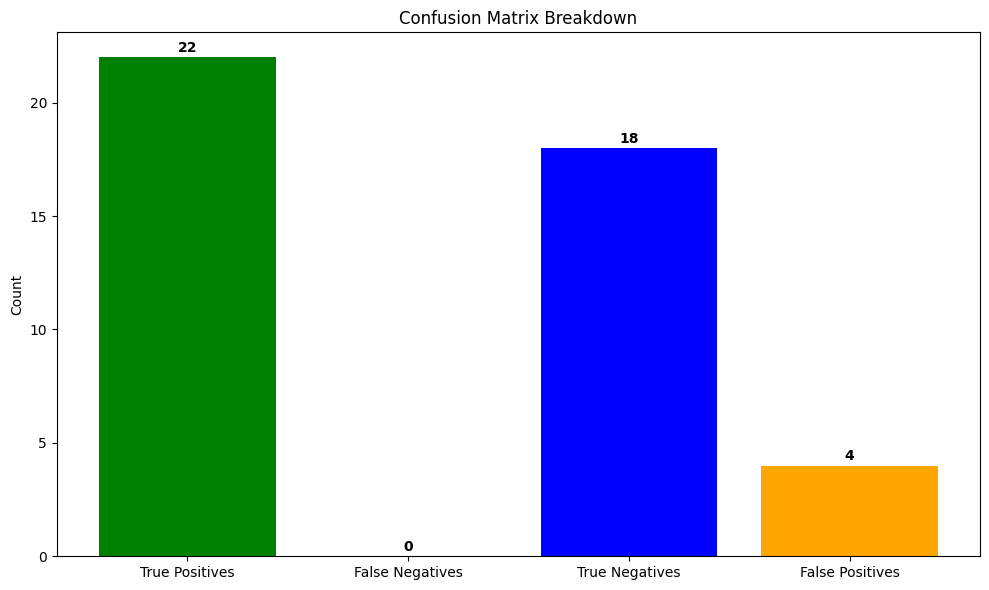

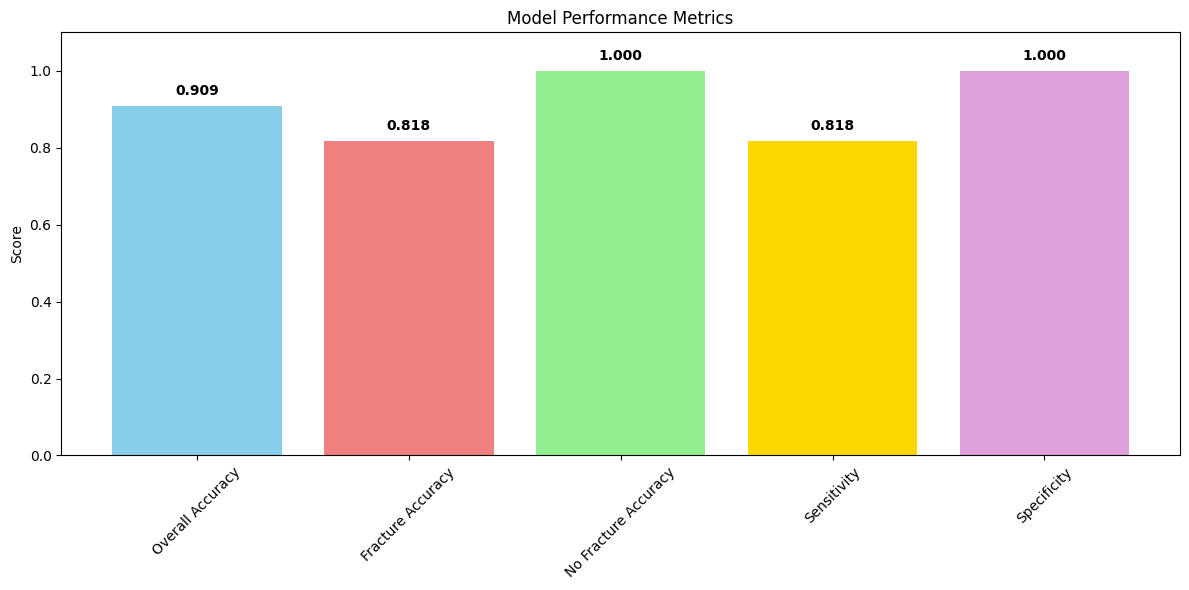

In [8]:
# Visualize classification results
import matplotlib.pyplot as plt
import json
import numpy as np

# Load results from the JSON file
results_file = "final_hybrid_test_results.json"
with open(results_file, "r") as f:
    results = json.load(f)

# Print structure to understand the data format
print("Results structure:")
print(f"Confusion matrix: {results['confusion_matrix']}")
print(f"Available keys: {list(results.keys())}")

# Extract data for visualization - confusion matrix is a 2D list
confusion_matrix = results["confusion_matrix"]
true_negatives = confusion_matrix[0][0]   # No fracture predicted as no fracture
false_positives = confusion_matrix[0][1]  # No fracture predicted as fracture
false_negatives = confusion_matrix[1][0]  # Fracture predicted as no fracture
true_positives = confusion_matrix[1][1]   # Fracture predicted as fracture

# Bar plot for confusion matrix
confusion_values = [true_positives, false_negatives, true_negatives, false_positives]
confusion_labels = ["True Positives", "False Negatives", "True Negatives", "False Positives"]

plt.figure(figsize=(10, 6))
bars = plt.bar(confusion_labels, confusion_values, color=['green', 'red', 'blue', 'orange'])
plt.title("Confusion Matrix Breakdown")
plt.ylabel("Count")

# Add value labels on bars
for bar, value in zip(bars, confusion_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
            str(value), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Performance metrics plot
metrics = {
    'Overall Accuracy': results['overall_accuracy'],
    'Fracture Accuracy': results['fracture_accuracy'], 
    'No Fracture Accuracy': results['no_fracture_accuracy'],
    'Sensitivity': results['sensitivity'],
    'Specificity': results['specificity']
}

plt.figure(figsize=(12, 6))
bars = plt.bar(metrics.keys(), metrics.values(), 
               color=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'plum'])
plt.title("Model Performance Metrics")
plt.ylabel("Score")
plt.ylim(0, 1.1)
plt.xticks(rotation=45)

# Add value labels
for bar, (metric, value) in zip(bars, metrics.items()):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
            f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()